# Worksheet 06

Name:  
UID: 

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

They have different initialization. K means picking initial centroids randomly, while k means ++ picks first centroid randomly and then picks the following centroids with increased possibilty proportional to the distance from the previous centroid.

b) What are some limitations of K means ++?

If there's a very significant outliner, it will affect the initializion process a lot.
It requires specify the number of clusters k, which means choosing an inappropritate value for k will potentially lead to bad results.


c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

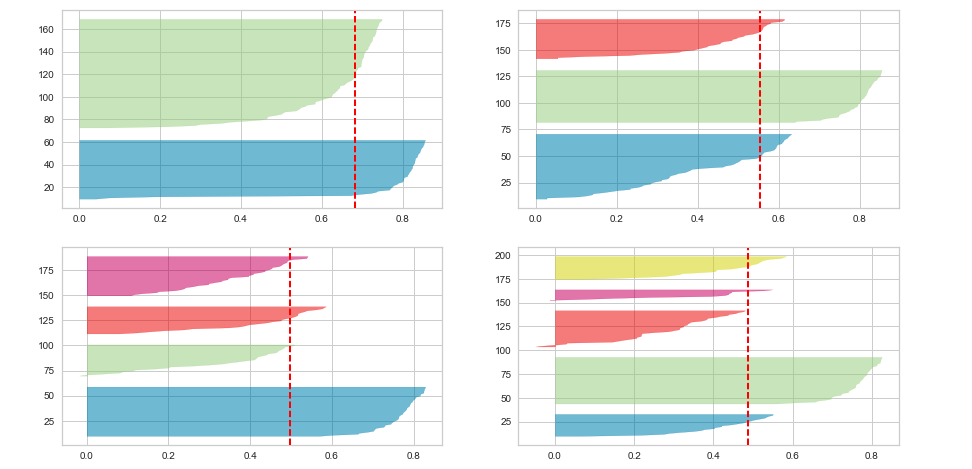

In [4]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

A higher value indicates the object is well matched to its own cluster. Therefore I would choose K=2 because it has the highest average silhouette score, meaning that it creates the best separation between different clusters. However, K=3 looks also good. It still offer a relatively high average silhouette score but with more granularity in clusering. 

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | 1.41  | 3 |  1 |  2.83 |
| B | 1.41  | 0 | 2.24  | 1  | 1.41  |
| C | 3 | 2.24  | 0 | 3.16  | 2.24  |
| D | 1  | 1 | 3.16  | 0 | 2.24  |
| E | 2.83  | 1.41  | 2.24  | 2.24  | 0 |

Step 2

|   | B  | C  | A,D  | E  |
|---|---|---|---|---|
| B  | 0 | 2.24  | 1  | 1.41  |
| C  | 2.24  | 0 | 3  | 2.24  |
| A,D  | 1  | 3  | 0 | 2.24  |
| E  | 1.41  | 2.24  | 2.24  | 0 |

Step 3

|   | C  | A,B,D  | E  |
|---|---|---|---|
| C  | 0 | 2.24  | 2.24  |
| A,B,D  | 2.24  | 0 | 1.41  |
| E  | 2.24  | 1.41  | 0 |

Step 4

|   | C  | A,B,D,E  |
|---|---|---|
| C  | 0 | 2.24  |
| A,B,D,E  | 2.24  | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | 1.41  | 3  | 1  | 2.83  |
| B | 1.41  | 0 | 2.24  | 1  | 1.41  |
| C | 3  | 2.24  | 0 | 3.16  | 2.24  |
| D | 1  | 1  | 3.16  | 0 | 2.24  |
| E | 2.83  | 1.41  | 2.24  | 2.24  | 0 |

Step 2

|   | B  | C  | A,D  | E  |
|---|---|---|---|---|
| B  | 0 | 2.24  | 1.41  | 1.41  |
| C  | 2.24  | 0 | 3.16  | 2.24  |
| A,D  | 1.41  | 3.16  | 0 | 2.83  |
| E  | 1.41 | 2.24  | 2.83  | 0 |

Step 3

|   | C | A,B,D  | E  |
|---|---|---|---|
| C  | 0 | 3.16  | 2.24  |
| A,B,D  | 3.16  | 0 | 2.83  |
| E  | 2.24  | 2.83  | 0 |

Step 4

|   | A,B,D  | C,E  |
|---|---|---|
| A,B,D  | 0 | 3.16  |
| C,E  | 3.16  | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

/tmp/ipykernel_14385/1891294109.py:37: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  result = linkage(distance_matrix, 'single')


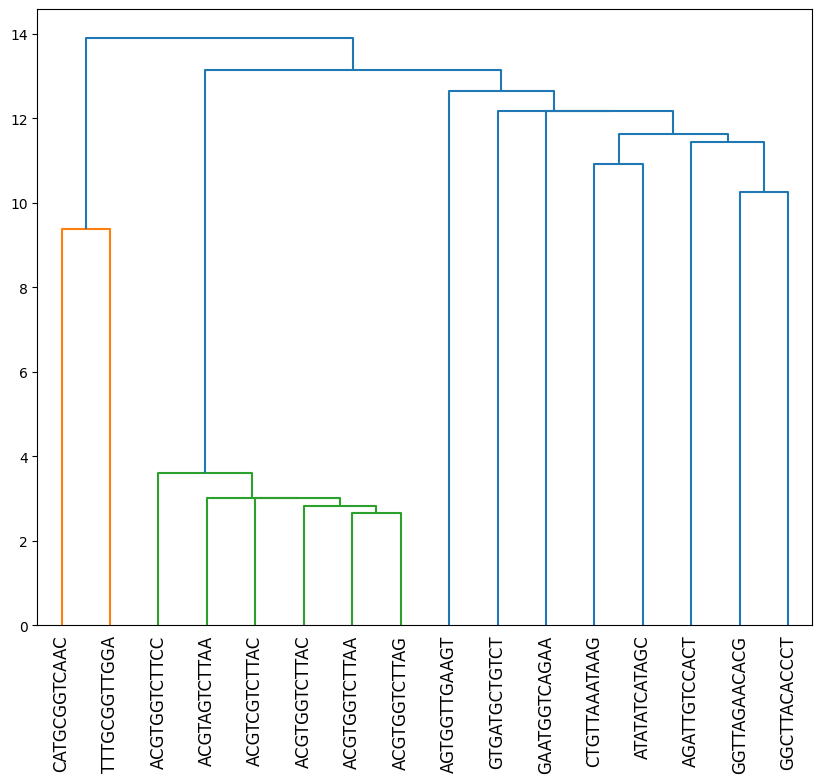

In [5]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

def finding_distance(s1, s2):
  return sum(c1 != c2 for c1, c2 in zip(s1, s2))

distance_matrix = np.zeros((len(sequences), len(sequences)))

for i, seq1 in enumerate(sequences):
  for j, seq2 in enumerate(sequences):
    if i < j:
      # symmetric so we only need to compute half of it
      dist = finding_distance(seq1, seq2)
      distance_matrix[i, j] = dist
      distance_matrix[j, i] = dist

result = linkage(distance_matrix, 'single')

plt.figure(figsize=(10, 8))
dendrogram(result, labels=sequences, leaf_rotation = 90)
plt.show()